In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as sf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, GlobalAveragePooling2D, Activation,MaxPooling2D,MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam

## 讀入cifar10資料集

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data() 

In [3]:
category= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 檢視我們的測試資料

(-0.5, 31.5, 31.5, -0.5)

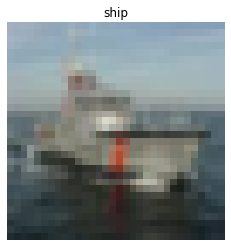

In [4]:
n = np.random.randint(X_train.shape[0])
X_sample = X_train[n]
y_sample = Y_train[n].squeeze()

plt.imshow(X_sample)
plt.title(category[y_sample])
plt.axis('off')

## 標準化資料
### 將資料轉成0到1之間

In [5]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [6]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

## 查看數據型態
### 圖片為32X32

In [7]:
print(X_train.shape, X_test.shape, sep="\n")

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## 建立分類cifar10的卷積神經網路

In [12]:
CNN_layers = [Conv2D(8, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [13]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 32)        2336      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 128)         36992     
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

## 組裝神經網路及訓練模型
### 設定訓練數值:batch_size = 300 ,epochs=10

In [14]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['categorical_accuracy'])

In [17]:
model.fit(X_train,Y_train, 
           batch_size=1000, 
           epochs=10,
          validation_data=(X_test, Y_test)
           )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 733us/sample - loss: 1.4781 - categorical_accuracy: 0.4607 - val_loss: 1.4513 - val_categorical_accuracy: 0.4698
Epoch 2/10
50000/50000 [==============================] - 37s 731us/sample - loss: 1.4597 - categorical_accuracy: 0.4676 - val_loss: 1.4611 - val_categorical_accuracy: 0.4628
Epoch 3/10
50000/50000 [==============================] - 36s 727us/sample - loss: 1.4561 - categorical_accuracy: 0.4688 - val_loss: 1.4367 - val_categorical_accuracy: 0.4720
Epoch 4/10
50000/50000 [==============================] - 36s 721us/sample - loss: 1.4371 - categorical_accuracy: 0.4784 - val_loss: 1.4093 - val_categorical_accuracy: 0.4845
Epoch 5/10
50000/50000 [==============================] - 37s 736us/sample - loss: 1.4233 - categorical_accuracy: 0.4834 - val_loss: 1.4277 - val_categorical_accuracy: 0.4770
Epoch 6/10
50000/50000 [==============================] - 37s 735us/sample 

## 存下模型、模型預測

In [18]:
score_train = model.evaluate(X_train, Y_train)
score_test = model.evaluate(X_test, Y_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 4s 378us/sample - loss: 1.3555 - categorical_accuracy: 0.5068
Train Accuracy: 50.86600184440613
Test Accuracy: 50.679999589920044


In [19]:
model.save_weights('LeNet5_CIFAR10_HW.h5')

## 遷移學習 (Transfer Learning) 中的 Layer Transfer 的技巧

In [20]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

## 讀入 Fasion mnist

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
(X_train_2, y_train_2), (X_test_2, y_test_2) = fashion_mnist.load_data()

In [23]:
X_train_2 = X_train_2.reshape(60000, 28, 28, 1)/255
X_test_2 = X_test_2.reshape(10000, 28, 28, 1)/255
# One-hot encoding
y_train_2 = to_categorical(y_train_2, 10)
y_test_2 = to_categorical(y_test_2, 10)

## 建立Model2模型

### 重新設定fashion_mnist CNN layer

In [33]:
CNN_layers_mnist = [Conv2D(8, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(32, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

## 應用Transfer Learning : 使用model的FC_layer

In [35]:
model2 = Sequential(CNN_layers_mnist+FC_layers)
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 14, 14, 32)        2336      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 7, 7, 128)         36992     
_________________________________________________________________
global_average_pooling2d_5 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

## 訓練模型

In [36]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['categorical_accuracy'])
model2.fit(X_train_2, y_train_2, batch_size=1000, epochs=5,validation_data=(X_test_2, y_test_2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 40s 670us/sample - loss: 1.8390 - categorical_accuracy: 0.3353 - val_loss: 1.1779 - val_categorical_accuracy: 0.5996
Epoch 2/5
60000/60000 [==============================] - 38s 633us/sample - loss: 0.9887 - categorical_accuracy: 0.6478 - val_loss: 0.8812 - val_categorical_accuracy: 0.6815
Epoch 3/5
60000/60000 [==============================] - 38s 635us/sample - loss: 0.8122 - categorical_accuracy: 0.7101 - val_loss: 0.7958 - val_categorical_accuracy: 0.7193
Epoch 4/5
60000/60000 [==============================] - 38s 632us/sample - loss: 0.7395 - categorical_accuracy: 0.7329 - val_loss: 0.7446 - val_categorical_accuracy: 0.7326
Epoch 5/5
60000/60000 [==============================] - 38s 636us/sample - loss: 0.6980 - categorical_accuracy: 0.7450 - val_loss: 0.6929 - val_categorical_accuracy: 0.7520


## 存下模型

In [37]:
model2.save_weights('transferlearning_HW_mnist.h5')

## 模型預測

In [38]:
model2.load_weights('transferlearning_HW_mnist.h5')

score_train = model2.evaluate(X_train_2, y_train_2)
score_test = model2.evaluate(X_test_2, y_test_2)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 3s 308us/sample - loss: 0.6929 - categorical_accuracy: 0.7520
Train Accuracy: 75.78166723251343
Test Accuracy: 75.19999742507935


## 查看舊模型的預測

In [39]:
score_train = model.evaluate(X_train, Y_train)
score_test = model.evaluate(X_test, Y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 3s 338us/sample - loss: 3.5240 - categorical_accuracy: 0.3246
Train Accuracy: 32.49000012874603
Test Accuracy: 32.46000111103058
